# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('train_test_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

train_test_data\X_test.csv
train_test_data\X_train.csv
train_test_data\y_test.csv
train_test_data\y_train.csv


# Data Loading

In [2]:
X_train=pd.read_csv('train_test_data/X_train.csv')
X_test=pd.read_csv('train_test_data/X_test.csv')
y_train=pd.read_csv('train_test_data/y_train.csv')
y_test=pd.read_csv('train_test_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(28000, 19) (7000, 19) (28000, 1) (7000, 1)


In [3]:
X_train.head()

,TCP_WIN_MAX_OUT,L4_DST_PORT,PROTOCOL,DNS_QUERY_ID,DNS_QUERY_TYPE,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,NUM_PKTS_128_TO_256_BYTES,MIN_TTL,MAX_TTL,L7_PROTO,NUM_PKTS_1024_TO_1514_BYTES,OUT_BYTES,FTP_COMMAND_RET_CODE,DST_TO_SRC_AVG_THROUGHPUT,RETRANSMITTED_OUT_BYTES,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_OUT_PKTS,OUT_PKTS
0,0.000000,0.008286,0.3125,0.0,0.0,0.034707,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.038487,0.3125,0.0,0.0,0.026030,0.102302,0.0,0.00000,0.00000,0.000000,0.0,0.001618,0.0,0.001630,0.0,0.0,0.0,0.021277
2,0.000000,0.054113,0.3125,0.0,0.0,0.026030,0.102302,0.0,0.00000,0.00000,0.000000,0.0,0.001618,0.0,0.001630,0.0,0.0,0.0,0.021277
3,0.980240,0.001221,0.3125,0.0,0.0,0.026030,0.102302,0.0,0.25498,0.25498,0.028689,0.0,0.001780,0.0,0.001793,0.0,0.0,0.0,0.021277
4,0.441901,0.001221,0.3125,0.0,0.0,0.052061,0.132992,0.0,0.25498,0.25498,0.028689,0.0,0.002427,0.0,0.002444,0.0,0.0,0.0,0.021277


In [4]:
y_train.head()

,Attack
0,0
1,0
2,0
3,4
4,3


In [5]:
X_test.head()

,TCP_WIN_MAX_OUT,L4_DST_PORT,PROTOCOL,DNS_QUERY_ID,DNS_QUERY_TYPE,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,NUM_PKTS_128_TO_256_BYTES,MIN_TTL,MAX_TTL,L7_PROTO,NUM_PKTS_1024_TO_1514_BYTES,OUT_BYTES,FTP_COMMAND_RET_CODE,DST_TO_SRC_AVG_THROUGHPUT,RETRANSMITTED_OUT_BYTES,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_OUT_PKTS,OUT_PKTS
0,0.000000,0.000809,1.0000,0.357083,0.047059,0.093275,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.980240,0.001221,0.3125,0.000000,0.000000,0.026030,0.102302,0.0,0.25498,0.25498,0.028689,0.000000,0.001780,0.0,0.001793,0.0,0.0,0.0,0.021277
2,0.088380,0.001221,0.3125,0.000000,0.000000,0.052061,0.132992,0.0,0.25498,0.25498,0.028689,0.058824,0.052104,0.0,0.052473,0.0,0.0,0.0,0.063830
3,0.441901,0.001221,0.3125,0.000000,0.000000,0.052061,0.132992,0.0,0.25498,0.25498,0.028689,0.000000,0.026820,0.0,0.027011,0.0,0.0,0.0,0.063830
4,0.000000,0.000809,1.0000,0.610164,0.047059,0.095445,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [6]:
y_test.head()

,Attack
0,3
1,4
2,1
3,3
4,6


---

# Algorithm-1 : KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knc_model = KNeighborsClassifier(n_neighbors=2)
knc_model = knc_model.fit(X_train.values, y_train.values.ravel())

In [8]:
knc_prediction = knc_model.predict(X_test.values)
print(knc_prediction.tolist())

[3, 4, 1, 3, 6, 5, 0, 3, 1, 2, 3, 3, 0, 5, 4, 0, 4, 1, 6, 3, 1, 1, 4, 2, 5, 2, 3, 4, 0, 1, 1, 2, 2, 3, 2, 4, 0, 1, 2, 5, 4, 2, 2, 3, 5, 2, 2, 2, 1, 6, 1, 1, 4, 0, 1, 1, 0, 0, 2, 3, 6, 4, 0, 0, 4, 2, 2, 4, 1, 1, 1, 0, 5, 5, 2, 0, 6, 4, 5, 0, 2, 1, 6, 0, 3, 2, 2, 0, 2, 1, 0, 0, 4, 2, 3, 0, 2, 6, 6, 4, 5, 6, 3, 1, 0, 3, 3, 3, 6, 1, 4, 2, 2, 3, 1, 1, 3, 3, 5, 3, 5, 3, 3, 1, 5, 0, 1, 4, 2, 2, 3, 1, 5, 3, 1, 5, 1, 3, 6, 1, 3, 6, 1, 5, 6, 3, 1, 3, 1, 6, 2, 4, 1, 0, 2, 4, 4, 1, 2, 6, 3, 6, 2, 0, 4, 6, 4, 5, 3, 1, 1, 6, 0, 1, 4, 2, 2, 3, 1, 1, 2, 5, 6, 1, 5, 5, 2, 0, 5, 1, 3, 3, 2, 6, 2, 2, 3, 1, 3, 4, 5, 6, 1, 3, 5, 5, 3, 0, 5, 1, 0, 2, 1, 4, 1, 3, 5, 5, 3, 5, 3, 3, 3, 2, 1, 0, 3, 6, 1, 2, 0, 0, 1, 1, 1, 0, 4, 3, 4, 5, 1, 1, 2, 6, 1, 0, 0, 4, 3, 4, 0, 4, 3, 2, 5, 6, 3, 6, 4, 1, 3, 0, 1, 4, 0, 2, 3, 0, 4, 2, 4, 2, 1, 3, 0, 1, 2, 5, 1, 3, 6, 1, 2, 3, 5, 6, 5, 0, 4, 0, 5, 4, 4, 6, 4, 0, 3, 1, 2, 1, 2, 6, 3, 1, 5, 4, 2, 2, 2, 3, 4, 1, 1, 3, 1, 6, 0, 2, 5, 2, 0, 3, 1, 4, 5, 0, 4, 3, 2, 2, 5, 4, 4, 

In [9]:
y_true = y_test.values.ravel().tolist()
print(y_true)

[3, 4, 1, 3, 6, 5, 0, 4, 1, 6, 3, 3, 0, 5, 4, 0, 4, 1, 6, 3, 1, 1, 4, 2, 5, 2, 3, 4, 0, 1, 2, 2, 2, 3, 2, 4, 0, 1, 6, 5, 4, 6, 2, 3, 5, 2, 2, 2, 1, 6, 1, 3, 4, 0, 1, 1, 0, 0, 6, 3, 6, 4, 0, 0, 4, 2, 6, 4, 1, 1, 3, 0, 5, 5, 2, 0, 6, 4, 5, 0, 2, 1, 6, 0, 3, 2, 2, 0, 2, 1, 0, 0, 4, 2, 1, 0, 2, 6, 6, 4, 5, 6, 3, 1, 0, 3, 3, 3, 6, 6, 4, 2, 2, 3, 1, 6, 3, 3, 5, 3, 5, 4, 3, 1, 5, 5, 1, 4, 2, 2, 3, 3, 5, 6, 1, 5, 1, 3, 6, 1, 3, 6, 1, 5, 6, 3, 1, 3, 1, 6, 2, 4, 1, 0, 6, 4, 3, 1, 2, 6, 3, 6, 6, 0, 4, 6, 4, 5, 3, 6, 1, 6, 0, 1, 4, 2, 2, 4, 1, 1, 6, 5, 6, 1, 5, 5, 6, 0, 5, 1, 3, 3, 6, 6, 2, 2, 3, 2, 3, 4, 5, 6, 1, 3, 5, 5, 3, 0, 5, 1, 0, 2, 1, 4, 2, 3, 5, 5, 3, 5, 3, 4, 3, 6, 1, 0, 4, 6, 1, 2, 0, 0, 1, 1, 1, 0, 4, 3, 4, 5, 1, 1, 6, 6, 1, 0, 0, 4, 3, 4, 0, 4, 3, 6, 5, 6, 3, 6, 4, 1, 3, 5, 1, 4, 0, 2, 3, 0, 4, 6, 4, 2, 1, 3, 0, 1, 2, 5, 1, 4, 2, 1, 2, 3, 0, 6, 5, 0, 4, 0, 5, 4, 4, 6, 4, 0, 3, 1, 2, 1, 2, 6, 3, 6, 5, 4, 2, 2, 1, 3, 4, 1, 1, 3, 1, 6, 0, 2, 5, 6, 0, 3, 6, 3, 5, 0, 4, 4, 6, 2, 5, 4, 3, 

### Result Analysis

In [10]:
class_labels = ['Benign', 'ddos', 'dos', 'injection', 'password', 'scanning', 'xss']

***Accuracy Score***

In [11]:
knc_model_accuracy=accuracy_score(y_true=y_true,y_pred=knc_prediction)
print("Validation accuracy of KNeighborsClassifier model is {:.2f}%".format(knc_model_accuracy*100))

Validation accuracy of KNeighborsClassifier model is 82.51%


***Classification Report***

In [12]:
print(classification_report(y_true=y_true,y_pred=knc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.91      0.97      0.94      1000
        ddos       0.76      0.90      0.83      1000
         dos       0.70      0.80      0.75      1000
   injection       0.76      0.91      0.83      1000
    password       0.89      0.75      0.82      1000
    scanning       0.98      0.86      0.92      1000
         xss       0.83      0.59      0.69      1000

    accuracy                           0.83      7000
   macro avg       0.83      0.83      0.82      7000
weighted avg       0.83      0.83      0.82      7000



***Confusion Matrix***

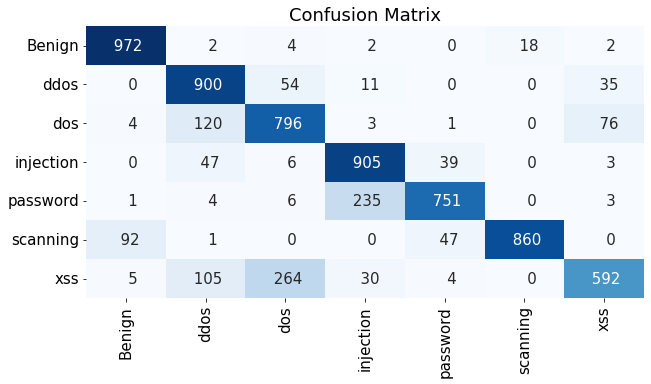

In [13]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=knc_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [14]:
with open(file="trained_models/KNeighborsClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=knc_model, file=file)

---

# Algorithm-2 : RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=500)
rfc_model = rfc_model.fit(X_train.values, y_train.values.ravel())

In [16]:
rfc_prediction = rfc_model.predict(X_test.values)
print(rfc_prediction.tolist())

[3, 4, 1, 4, 6, 5, 0, 3, 1, 2, 3, 3, 0, 5, 4, 0, 4, 1, 6, 3, 1, 1, 4, 2, 5, 2, 3, 5, 0, 1, 1, 2, 2, 3, 2, 4, 0, 1, 6, 5, 4, 6, 2, 3, 5, 2, 6, 2, 1, 6, 1, 1, 4, 0, 1, 1, 0, 0, 2, 3, 6, 4, 0, 0, 4, 2, 6, 4, 1, 1, 3, 0, 5, 5, 2, 0, 6, 4, 5, 0, 2, 1, 6, 0, 3, 2, 2, 0, 2, 1, 0, 0, 4, 2, 3, 0, 6, 6, 6, 4, 5, 6, 3, 1, 0, 3, 3, 3, 1, 1, 4, 6, 2, 3, 1, 2, 3, 3, 5, 3, 5, 4, 3, 2, 5, 5, 1, 4, 2, 2, 3, 3, 5, 6, 1, 5, 1, 3, 6, 1, 4, 6, 1, 5, 6, 3, 3, 3, 1, 6, 2, 4, 1, 0, 6, 4, 4, 1, 2, 2, 3, 6, 6, 0, 4, 6, 4, 5, 3, 6, 1, 3, 0, 1, 4, 2, 2, 3, 1, 1, 6, 5, 6, 1, 5, 5, 2, 0, 5, 1, 3, 3, 6, 6, 2, 2, 3, 1, 3, 4, 5, 6, 1, 3, 5, 5, 3, 0, 5, 1, 0, 2, 1, 4, 2, 3, 5, 5, 3, 5, 3, 3, 3, 2, 1, 0, 3, 6, 1, 2, 0, 0, 1, 1, 1, 0, 4, 3, 4, 5, 1, 1, 1, 6, 1, 0, 0, 4, 4, 4, 0, 4, 3, 6, 5, 6, 3, 6, 4, 1, 3, 0, 1, 4, 0, 2, 3, 0, 4, 6, 4, 2, 1, 3, 0, 1, 2, 5, 1, 3, 6, 1, 2, 3, 0, 6, 5, 0, 4, 0, 5, 4, 4, 6, 4, 0, 3, 1, 2, 1, 2, 6, 3, 1, 5, 4, 2, 2, 2, 3, 4, 1, 1, 3, 1, 6, 0, 2, 5, 6, 0, 3, 6, 4, 5, 0, 4, 4, 2, 2, 5, 4, 4, 

In [17]:
y_true = y_test.values.ravel().tolist()
print(y_true)

[3, 4, 1, 3, 6, 5, 0, 4, 1, 6, 3, 3, 0, 5, 4, 0, 4, 1, 6, 3, 1, 1, 4, 2, 5, 2, 3, 4, 0, 1, 2, 2, 2, 3, 2, 4, 0, 1, 6, 5, 4, 6, 2, 3, 5, 2, 2, 2, 1, 6, 1, 3, 4, 0, 1, 1, 0, 0, 6, 3, 6, 4, 0, 0, 4, 2, 6, 4, 1, 1, 3, 0, 5, 5, 2, 0, 6, 4, 5, 0, 2, 1, 6, 0, 3, 2, 2, 0, 2, 1, 0, 0, 4, 2, 1, 0, 2, 6, 6, 4, 5, 6, 3, 1, 0, 3, 3, 3, 6, 6, 4, 2, 2, 3, 1, 6, 3, 3, 5, 3, 5, 4, 3, 1, 5, 5, 1, 4, 2, 2, 3, 3, 5, 6, 1, 5, 1, 3, 6, 1, 3, 6, 1, 5, 6, 3, 1, 3, 1, 6, 2, 4, 1, 0, 6, 4, 3, 1, 2, 6, 3, 6, 6, 0, 4, 6, 4, 5, 3, 6, 1, 6, 0, 1, 4, 2, 2, 4, 1, 1, 6, 5, 6, 1, 5, 5, 6, 0, 5, 1, 3, 3, 6, 6, 2, 2, 3, 2, 3, 4, 5, 6, 1, 3, 5, 5, 3, 0, 5, 1, 0, 2, 1, 4, 2, 3, 5, 5, 3, 5, 3, 4, 3, 6, 1, 0, 4, 6, 1, 2, 0, 0, 1, 1, 1, 0, 4, 3, 4, 5, 1, 1, 6, 6, 1, 0, 0, 4, 3, 4, 0, 4, 3, 6, 5, 6, 3, 6, 4, 1, 3, 5, 1, 4, 0, 2, 3, 0, 4, 6, 4, 2, 1, 3, 0, 1, 2, 5, 1, 4, 2, 1, 2, 3, 0, 6, 5, 0, 4, 0, 5, 4, 4, 6, 4, 0, 3, 1, 2, 1, 2, 6, 3, 6, 5, 4, 2, 2, 1, 3, 4, 1, 1, 3, 1, 6, 0, 2, 5, 6, 0, 3, 6, 3, 5, 0, 4, 4, 6, 2, 5, 4, 3, 

### Result Analysis

In [18]:
class_labels = ['Benign', 'ddos', 'dos', 'injection', 'password', 'scanning', 'xss']

***Accuracy Score***

In [19]:
rfc_model_accuracy=accuracy_score(y_true=y_true,y_pred=rfc_prediction)
print("Validation accuracy of RandomForestClassifier model is {:.2f}%".format(rfc_model_accuracy*100))

Validation accuracy of RandomForestClassifier model is 86.71%


***Classification Report***

In [20]:
print(classification_report(y_true=y_true,y_pred=rfc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      1000
        ddos       0.89      0.86      0.88      1000
         dos       0.78      0.81      0.79      1000
   injection       0.85      0.87      0.86      1000
    password       0.87      0.84      0.85      1000
    scanning       0.95      0.95      0.95      1000
         xss       0.79      0.77      0.78      1000

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000



***Confusion Matrix***

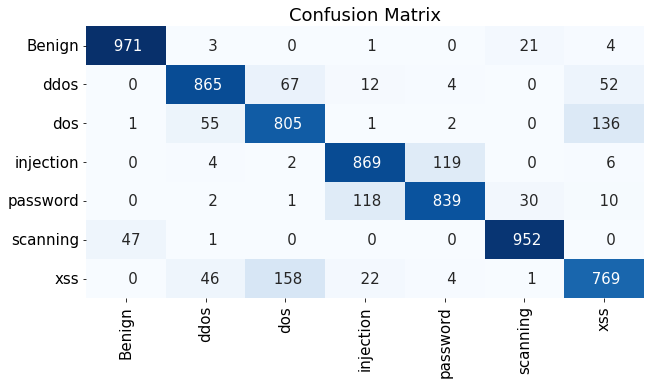

In [21]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=rfc_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [22]:
with open(file="trained_models/RandomForestClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=rfc_model, file=file)

---